In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd

In [2]:
iris = sd.load_iris()#可以在E:\Dev_Kits_Python\python-3.8.2\Lib\site-packages\sklearn\datasets\data中直接找到
iris.keys()#['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
# print(iris.data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#按照鸢尾花的种类分组，观察其他四个特征的特征值
# data.pivot_table(index='target', values='sepal length (cm)')#观察单个种类分组的特征情况
data.pivot_table(index='target')

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
target,,,,
0,1.462,0.246,5.006,3.428
1,4.260,1.326,5.936,2.770
2,5.552,2.026,6.588,2.974


# 数据可视化，绘制散点图

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

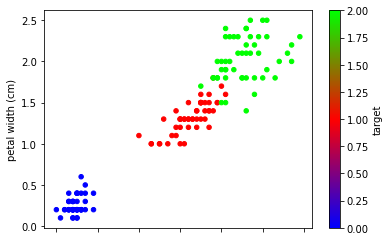

In [5]:
import matplotlib.pyplot as plt
data.plot.scatter(x='petal length (cm)', y='petal width (cm)', c = 'target', cmap = 'brg')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

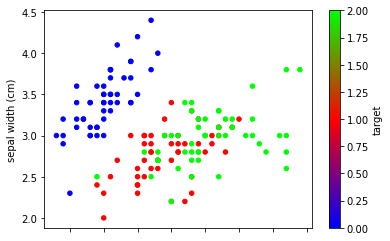

In [6]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c= 'target', cmap='brg')

# 绘制逻辑函数 sigmoid

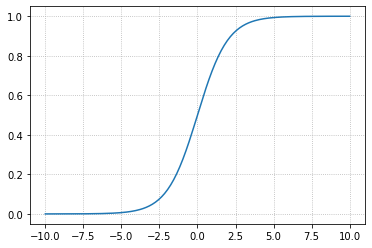

In [7]:
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))
plt.grid(linestyle=':')
plt.plot(x, y)

# 使用逻辑回归对鸢尾花数据集进行二分类

In [8]:
sub_data = data.tail(100)
sub_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
import sklearn.model_selection as ms
x, y = sub_data.loc[:,:'petal width (cm)'], sub_data['target']
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.2, random_state=7)

In [10]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver = 'liblinear', C = 1.0)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print('训练集预测结果：', model.predict(train_x))
print('测试集预测结果：', model.predict(test_x))
print('测试集真实结果：', test_y.values)
print('正确率：', ((pred_test_y == test_y.values).sum()) / test_y.size )

训练集预测结果： [2 1 1 2 1 2 2 1 2 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2 1 1 2 2 1 2 1 1 1 2 1 2 2
 2 1 1 2 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 2 2
 1 2 2 1 2 1]
测试集预测结果： [1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 1 1 2 2 2]
测试集真实结果： [1 1 2 2 1 1 2 2 2 1 1 1 2 1 2 1 1 2 1 1]
正确率： 0.85


# 多元分类

In [17]:
x, y = data.loc[:,:'petal width (cm)'], data['target']
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.2, random_state=7, stratify=y)
model = lm.LogisticRegression(solver = 'liblinear', C = 1.0)

In [18]:
#交叉验证
import sklearn.model_selection as ms
s_score = ms.cross_val_score(model, x, y, cv = 5, scoring = 'accuracy')
print(s_score.mean())
s_score = ms.cross_val_score(model, x, y, cv = 5, scoring = 'precision_weighted')
print(s_score.mean())
s_score = ms.cross_val_score(model, x, y, cv = 5, scoring = 'recall_weighted')
print(s_score.mean())
s_score = ms.cross_val_score(model, x, y, cv = 5, scoring = 'f1_weighted')
print(s_score.mean())

0.9600000000000002
0.9652214452214454
0.9600000000000002
0.959522933505973


In [19]:
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print('训练集预测结果：', model.predict(train_x))
print('测试集预测结果：', model.predict(test_x))
print('测试集真实结果：', test_y.values)
print('正确率：', ((pred_test_y == test_y.values).sum()) / test_y.size )

训练集预测结果： [2 0 2 2 2 2 0 2 0 1 2 2 0 2 1 2 1 0 1 0 0 1 0 2 1 1 0 1 0 1 2 1 1 0 1 2 2
 0 2 2 2 2 1 1 0 2 0 2 0 1 1 1 1 2 1 2 0 2 0 1 1 0 2 1 1 2 0 1 2 0 0 2 0 2
 0 0 2 0 1 2 0 1 1 0 0 1 0 0 0 0 1 2 2 2 0 1 2 2 1 0 2 0 1 1 1 2 0 2 2 2 0
 2 2 1 2 0 0 2 1 0]
测试集预测结果： [2 0 0 1 2 1 2 0 2 2 1 0 0 2 1 1 0 0 1 1 2 0 1 0 2 2 1 1 0 2]
测试集真实结果： [2 0 0 1 2 1 2 0 2 2 1 0 0 1 1 1 0 0 1 1 2 0 1 0 2 2 2 1 0 2]
正确率： 0.9333333333333333


# 混淆矩阵

In [20]:
import sklearn.metrics as sm 
matricx_a = sm.confusion_matrix(test_y, model.predict(test_x))
matricx_a

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

# 分类报告

In [22]:
cr = sm.classification_report(test_y, model.predict(test_x))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# 绘制错误样本

In [ ]:
error_samples = test_x[pred_test_y != test_y]
error_samples

In [ ]:
ax = data.plot.scatter(x='petal length (cm)', y='petal width (cm)', c = 'target', cmap = 'brg')
error_samples.plot.scatter(x='petal length (cm)', y='petal width (cm)', color = 'gray', 
                           s = 50, marker = 'D', alpha = 0.5, ax=ax)